In [1]:
import pandas as pd
import os
from PIL import Image
import numpy as np

In [2]:
train_path = "Training"
test_path = "Validation"

train_female = "Training/female"
train_male = "Training/male"

test_female = "Validation/female"
test_male = "Validation/male"

In [4]:
male_train=[]
label = []
for i in os.listdir(train_male):
    image_path = train_male+ "/" + i
    if os.path.isfile(image_path):
        males = Image.open(image_path).convert("L")# Converting grey scale
        males = males.resize((50,50),Image.ANTIALIAS)
        
        males = np.asarray(males)/255.0# Normalizing Images
        male_train.append(males)
        label.append(1)# Label 1 for man

In [5]:
female_train = []
for i in os.listdir(train_female):
    image_path = train_female+ "/" + i
    if os.path.isfile(image_path):
        females = Image.open(image_path)
        females = females.resize((50,50),Image.ANTIALIAS).convert("L")#Converting grey scale
        
        females = np.asarray(females)/255.0 # Normalizing Images
        
        female_train.append(females)
        label.append(0)# 0 for woman

In [6]:
x_train = np.concatenate((male_train,female_train),axis=0) # Training Dataset
y_train = np.asarray(label)# Label array
y_train = y_train.reshape(x_train.shape[0],1)

In [7]:
male_test = []
label2 = []
for i in os.listdir(test_male):
    image_path = test_male+ "/" + i
    if os.path.isfile(image_path):
        male_face = Image.open(image_path).convert("L")#Convert grey scale
        male_face = male_face.resize((50,50),Image.ANTIALIAS)
        
        male_face = np.asarray(male_face)/255.0 # Normalizing Images
        male_test.append(male_face)
        label2.append(1)# 1 for man

In [8]:
female_test = []
for i in os.listdir(test_female):
    image_path = test_female+ "/" + i
    if os.path.isfile(image_path):
        female_face = Image.open(image_path).convert("L")#Convert grey scale
        female_face = female_face.resize((50,50),Image.ANTIALIAS)
        
        female_face = np.asarray(female_face)/255.0# Normalizing Image
        female_test.append(female_face)
        label2.append(0)# 0 for  woman

In [9]:
x_test = np.concatenate((male_test,female_test),axis=0)#test dataset
y_test = np.asarray(label2)
y_test = y_test.reshape(x_test.shape[0],1)

In [10]:
X = np.concatenate((x_train,x_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)

X = x.reshape(x.shape[0],x.shape[1]*x.shape[2])# Convert 3D to 2D

NameError: name 'x' is not defined

In [ ]:
X.shape

In [ ]:
y.shape

In [2]:
misclass = pd.read_csv('Misclassified-Short.csv')

In [4]:
misclass = misclass.iloc[: , 1:]

In [6]:
female = misclass[misclass.gender == 0]
male = misclass[misclass.gender == 1]

In [8]:
male = male.drop(columns = ['gender', 'gender_predicted_svm_poly', 'gender_predicted_svm_rbf', 'gender_predicted_svm_sig', 'gender_predicted_randomforest', 'gender_predicted_ann'])

In [9]:
female = female.drop(columns = ['gender', 'gender_predicted_svm_poly', 'gender_predicted_svm_rbf', 'gender_predicted_svm_sig', 'gender_predicted_randomforest', 'gender_predicted_ann'])

In [10]:
image = male.iloc[1]

In [14]:
image = image.to_numpy()

In [15]:
image = np.reshape(image, (50,50))

In [16]:
image = image * 255

In [20]:
new_p = Image.fromarray(image)
new_p = new_p.convert("L")

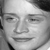

In [21]:
new_p

In [ ]:
new_p.save('male1.png')

In [23]:
os.chdir('misclass_male')

In [33]:
for i in range(male.shape[0]):
    image = male.iloc[i]
    image = image.to_numpy()
    image = np.reshape(image, (50,50))
    image = image * 255
    image = Image.fromarray(image)
    image = image.convert("L")
    filename = 'male_' + str(i) + '.png'
    image.save(filename)

In [37]:
os.chdir('C:\\Users\\ftbll\\Documents\\College\\Fall 2022\\CSE 512\\Project\\misclass_female')

In [38]:
for i in range(female.shape[0]):
    image = female.iloc[i]
    image = image.to_numpy()
    image = np.reshape(image, (50,50))
    image = image * 255
    image = Image.fromarray(image)
    image = image.convert("L")
    filename = 'female_' + str(i) + '.png'
    image.save(filename)